In [1]:
#This is a back tester used to test the performance of a portfolio of stocks over a period of time.

In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np

In [37]:
#INPUT PORTFOLIO + DATE RANGE
tickers = ["VOO", "SCHD", "VXUS", "QQQ"]
start_date = "2020-11-10"
end_date = datetime.now()

data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)
data = data["Close"]

[*********************100%***********************]  4 of 4 completed


In [38]:
#This drops any potential rows where stock data isn't available
data = data.dropna(how="all")
data = data.ffill()

In [56]:
returns = data.pct_change().dropna()
weights = [.3, .2, .2, .3]  # Equal weights for simplicity

In [57]:
#similuating portfolio growth
portfolio_returns = (returns * weights).sum(axis=1)
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod()
initial_investment = 10000
portfolio_value = initial_investment * portfolio_cumulative_returns

In [58]:
#comparing portfolio to benchmark: S&P 500
sp500 = yf.download("^GSPC", start=start_date, end=end_date, auto_adjust=True)["Close"]
sp500_returns = sp500.pct_change().dropna()
sp500_cumulative_returns = (1 + sp500_returns).cumprod()
sp500_value = initial_investment * sp500_cumulative_returns

[*********************100%***********************]  1 of 1 completed


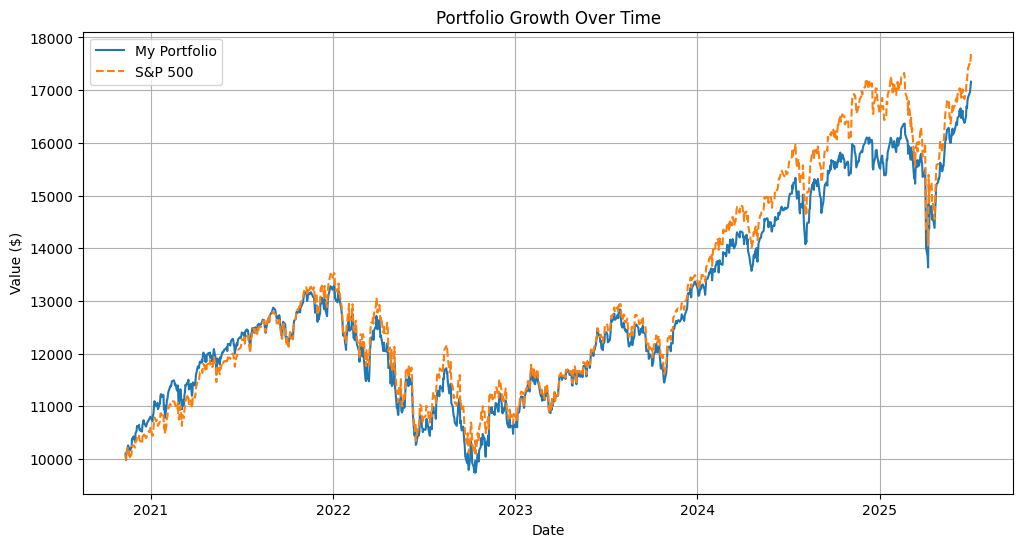

In [59]:
#plot results

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label="My Portfolio")
plt.plot(sp500_value, label="S&P 500", linestyle="--")
plt.title("Portfolio Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Value ($)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Self explanatory function to calculate portfolio metrics
def calculate_portfolio_metrics(portfolio_returns):

    annual_return = (1 + portfolio_returns.mean())**252 - 1
    annual_vol = portfolio_returns.std() * np.sqrt(252)
    sharpe = annual_return / annual_vol
    cumulative = (1 + portfolio_returns).cumprod()
    peak = cumulative.expanding().max()
    drawdown = (cumulative - peak)/peak
    max_dd = drawdown.min()
    
    return {
        'Annualized Return': annual_return,
        'Annualized Volatility': annual_vol,
        'Sharpe Ratio': sharpe,
        'Max Drawdown': max_dd
    }

#Calculating portfolio returns
portfolio_returns = (returns * weights).sum(axis=1)  
metrics = calculate_portfolio_metrics(portfolio_returns)
print("Portfolio Performance Metrics:")
print(f"Annualized Return: {metrics['Annualized Return']:.2%}")
print(f"Annualized Volatility: {metrics['Annualized Volatility']:.2%}")
print(f"Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")
print(f"Max Drawdown: {metrics['Max Drawdown']:.2%}")

Portfolio Performance Metrics:
Annualized Return: 13.96%
Annualized Volatility: 16.69%
Sharpe Ratio: 0.84
Max Drawdown: -26.72%
